### Comparison of spectra after OTSU data cleaning

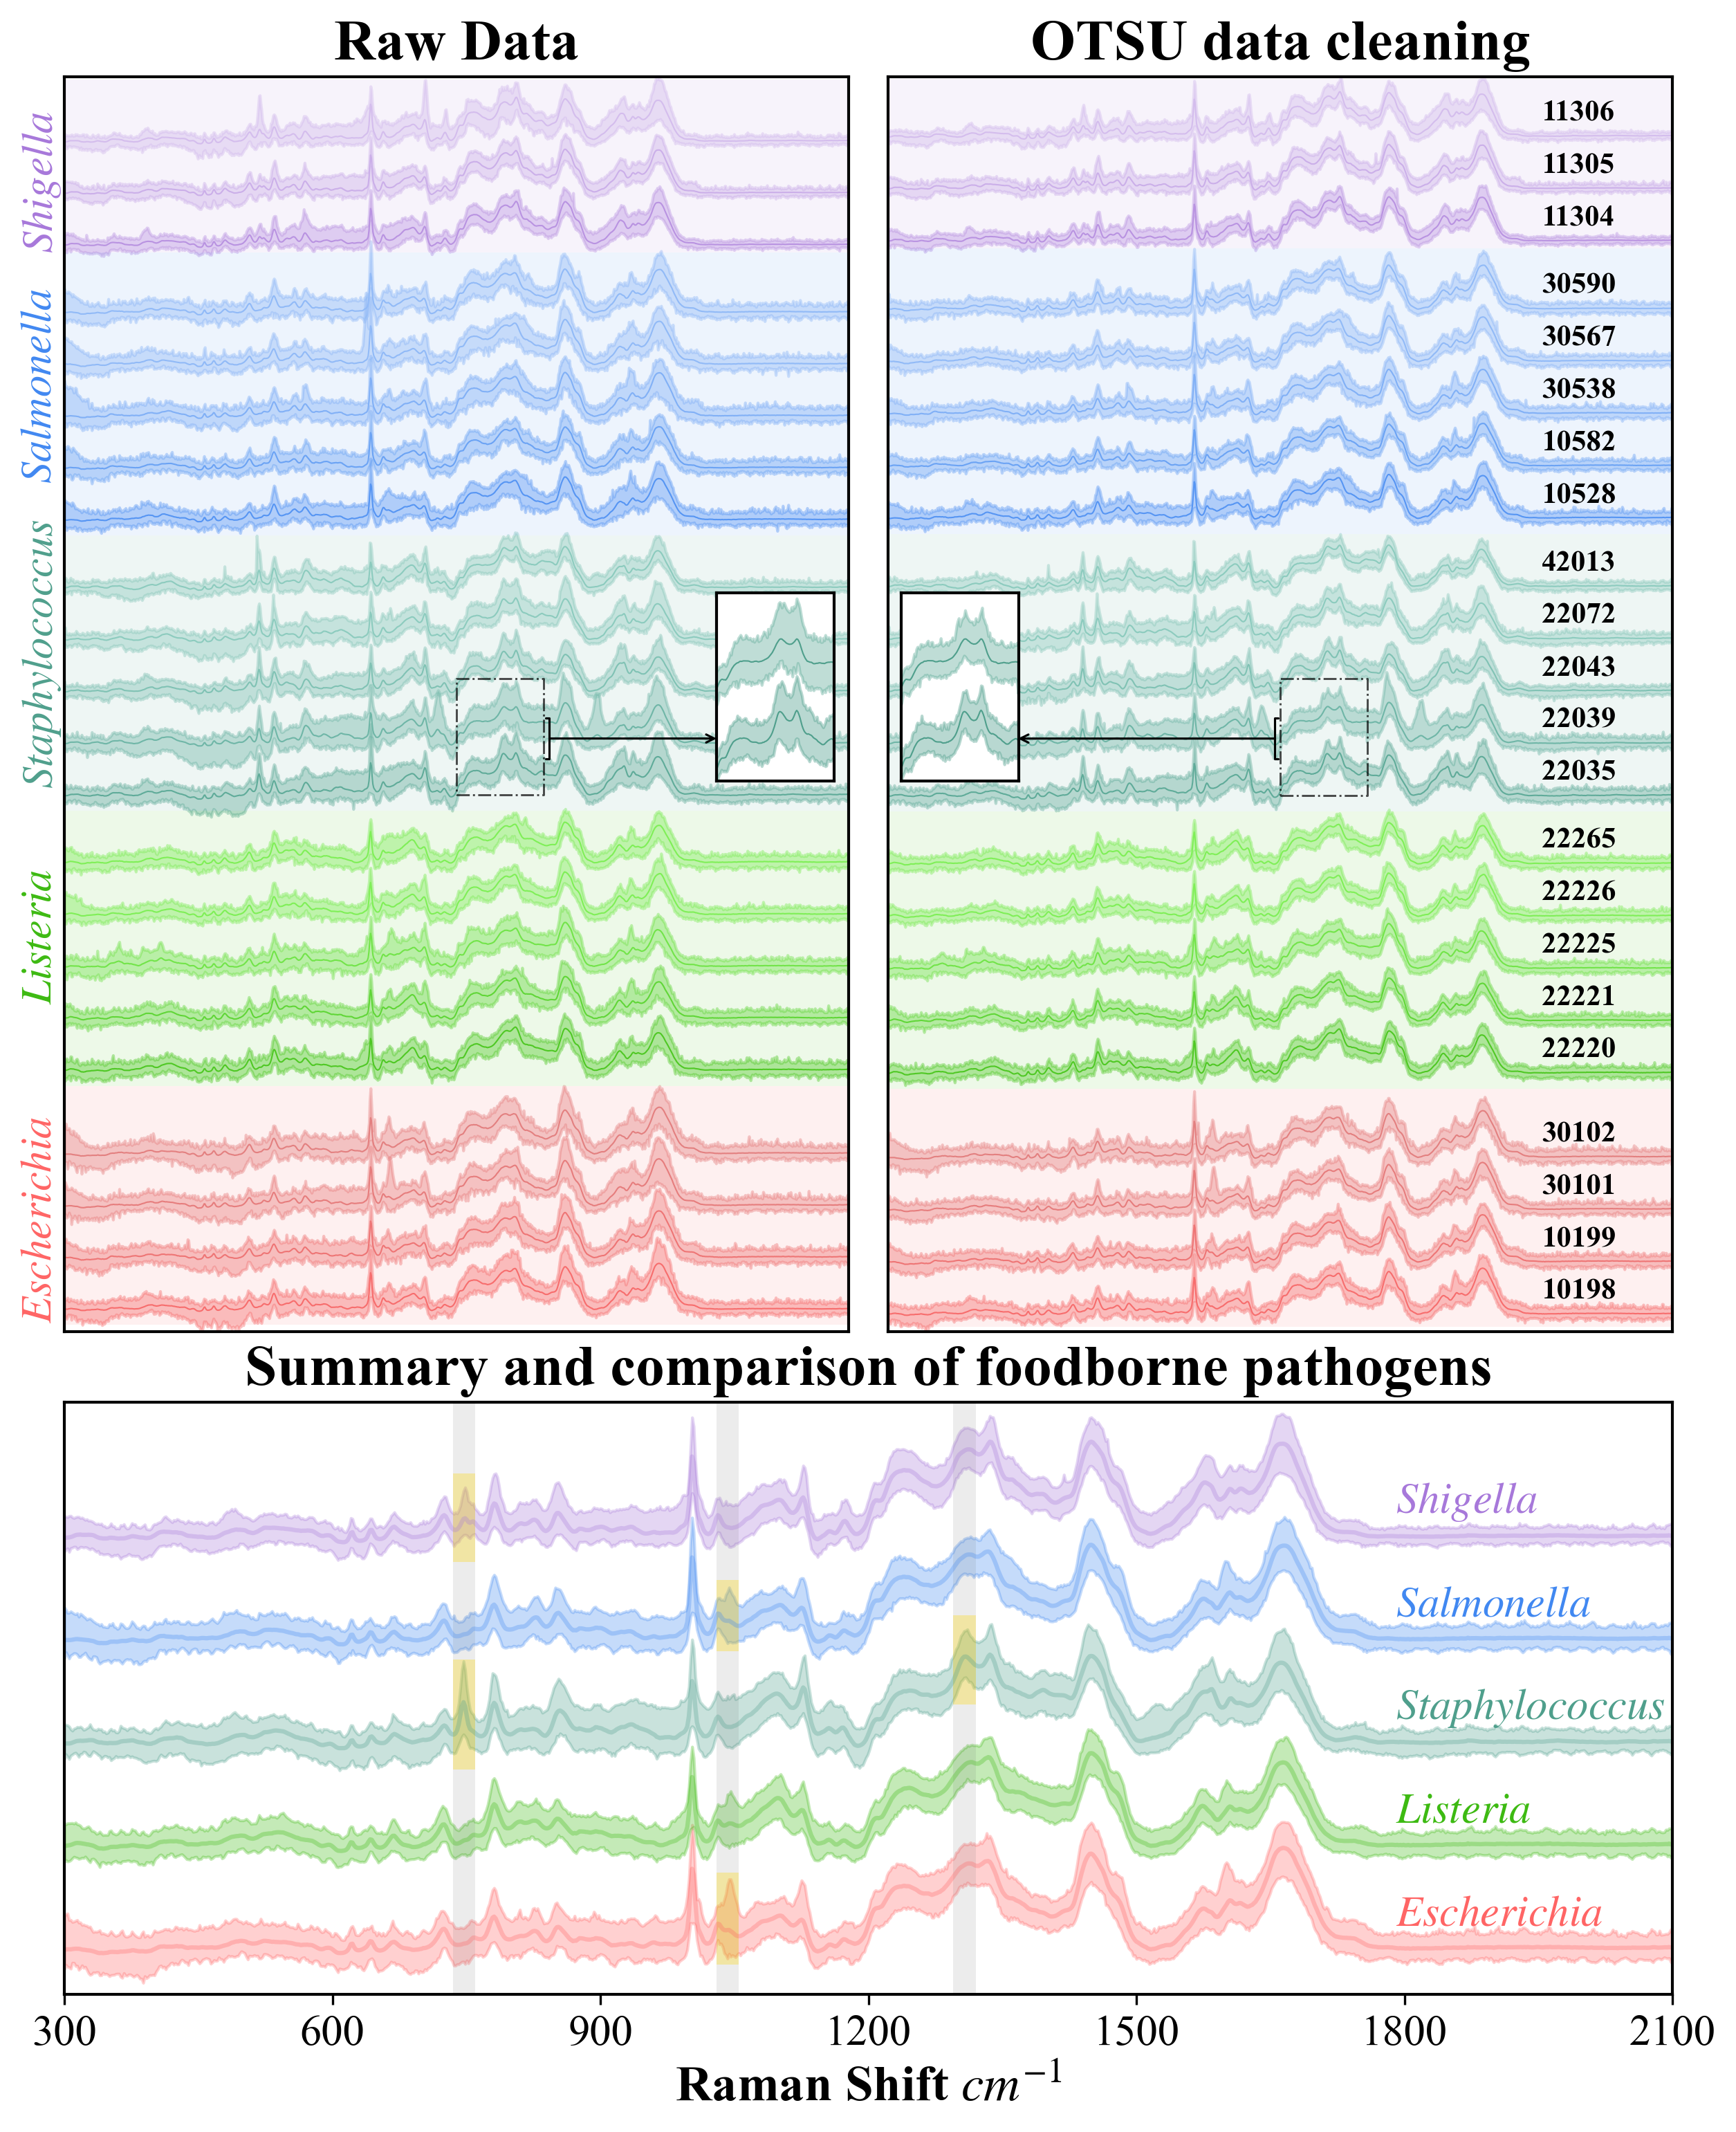

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap # Custom gradient colors
import copy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# This file function
# Realize the overall comparison of data before and after data cleaning
# Draw the spectrum and enlarge some details
# Perform visual drawing
# Drawing parameter initialization
#plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.linewidth'] = 1  # Frame width
plt.rcParams['figure.dpi'] = 300  # plt.show Display Resolution
plt.rcParams['mathtext.fontset'] = 'stix' # formula font 
#plt.rcParams['mathtext.bf'] = 'blod'# 
#matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
''''''
font = {'family': 'serif',
        'serif': 'Times New Roman', # # 
        'weight': 'normal',
        # 'size': 10
        }
plt.rc('font', **font)
#plt.style.use('ggplot')


name_list = ['coli', 'Listeria', 'Staphylococcus', 'Salmonella', 'Shigella']
# 5 Foodborne Pathogens_raw
data_list = {
     'Escherichia coli':{},
     'Listeria monocytogenes':{},
     'Staphylococcus aureus' :{},
     'Salmonella':{},
     'Shigella':{}
}
###################################################################################################################
keys_list = list(data_list.keys())

otsu_floder = 'Preprocess_data/OTSU_Floder'
otsu_csv = os.listdir(otsu_floder)

# step1. Load data and namelist
for i in range(len(otsu_csv)):
    csvname = otsu_csv[i]
    csvpath = otsu_floder + os.sep + csvname
    
    # init category
    category = None
    for name in name_list:
        if name in csvname:
            category = name
            break

    # If find category
    if category:
        # Get the specific name of the bacteria
        bacterium = None
        for key in keys_list:
            if key in csvname.replace('_', ' '):
                bacterium = key
                break
        
        if bacterium:

            csvdata = pd.read_csv(csvpath)

            data_list[bacterium][csvname] ={
                'Mean': csvdata['Mean'].values,
                'Max': csvdata['Max'].values,
                'Min': csvdata['Min'].values,
                'OTSU_Mean': csvdata['OTSU_Mean'].values,
                'OTSU_Max': csvdata['OTSU_Max'].values,
                'OTSU_Min': csvdata['OTSU_Min'].values            
            }

Raman_Shift = np.linspace(300, 2100, 1000)
name = pd.read_csv('name_idx.csv', header=None)
class_name = name.iloc[:,1].values
class_id = name.iloc[:,2].values
class_id = class_id[:-1]
new_class_id = name.iloc[:,4].values
new_class_id = new_class_id[:-1].astype(int)
###################################################################################################################
# step2. Drawing
fig = plt.figure(figsize=(10, 12))
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=2)
ax1.margins(x=0, y=0.001) 

ax2 = plt.subplot2grid((3, 2), (0, 1), rowspan=2)
ax2.margins(x=0, y=0.001)

ax3 = plt.subplot2grid((3, 2), (2, 0), rowspan=1, colspan=2)  # span across two columns
ax3.margins(x=0,y=0.02)
plt.subplots_adjust(wspace=0.05, hspace=0.12)

# 
cmaps = {}
start_colors = [(1, 0.396, 0.396), (0.24, 0.729, 0.07), (0.309, 0.623, 0.549), (0.254, 0.533, 0.945), (0.654, 0.47, 0.854)]
end_colors = [(0.89, 0.5, 0.5), (0.498, 0.937, 0.341), (0.549, 0.796, 0.745), (0.568, 0.729, 0.968), (0.831, 0.741, 0.929)]
# Create gradient colors
for key, value in data_list.items():
    index_key = keys_list.index(key) 
    colors_list = [start_colors[index_key]]

    sec_key_list = list(value.keys())
    #for keys, values in value.items():
    for j in range(1, len(value) - 1):
        num_key = len(value) 
        #sec_index_key = sec_key_list.index(keys) 
        r = start_colors[index_key][0] + (end_colors[index_key][0] - start_colors[index_key][0]) * (j / (num_key - 2)) # RGB
        g = start_colors[index_key][1] + (end_colors[index_key][1] - start_colors[index_key][1]) * (j / (num_key - 2))
        b = start_colors[index_key][2] + (end_colors[index_key][2] - start_colors[index_key][2]) * (j / (num_key - 2))
        colors_list.append((r, g, b)) # Add RGB gradient color
    colors_list.append(end_colors[index_key]) 
    cmaps[f'custom_cmap{index_key}'] = LinearSegmentedColormap.from_list(f'custom_cmap{index_key}', colors_list)

###################################################################################################################
# Read the data required for drawing and draw the picture
comparison_ax = ax3  # Subgraphs for comparison
# First, draw the data before and after cleaning
for ax_id in range(2):
    all_class = 0
    if ax_id ==0:
        ax = ax1
    else:
        ax = ax2
    set_colors = 0 
    for idx, (bacterium, csv_data) in enumerate(data_list.items()):

        values_index = 0 
        flag = 0 
        subcategories = 0 
        base = 0
        for csvname, csv_values in csv_data.items():
            id_name = csvname.split('_')[0]
            for id_index in range(len(class_id)):
                if id_name == class_id[id_index]:
                    abbreviation_bacterium = str(new_class_id[id_index])

            all_class +=1 # For each subcategory passed, add 1 to the count.
            num_key = len(csv_values)
            values_index += 1
            mean = csv_values['Mean']
            max_value = csv_values['Max']
            min_value = csv_values['Min']

            otsu_mean = csv_values['OTSU_Mean']
            otsu_max_value = csv_values['OTSU_Max']
            otsu_min_value = csv_values['OTSU_Min']

            set_c = cmaps[f'custom_cmap{set_colors}'](values_index / (num_key - 1))
            
            if ax_id ==0:
                if subcategories ==0 and all_class != 1:
                    
                    flag = 1
                    ax.plot(Raman_Shift, (mean+ 0.33*(all_class) + 0.1*flag*(idx+1)), color=set_c,lw=0.5) 
                    ax.fill_between(Raman_Shift, (max_value+ 0.33*(all_class) + 0.1*flag*(idx+1)), (min_value+ 0.33*(all_class) + 0.1*flag*(idx+1)),
                                    color=set_c, alpha=0.4)
                    baseline = 0.33*(all_class-1) + 0.1*flag*(idx+1)
                    base = copy.copy(baseline)
                else:
                    ax.plot(Raman_Shift, (mean + 0.33*(values_index) + base), color=set_c,lw=0.5)
                    ax.fill_between(Raman_Shift, (max_value+ 0.33*(values_index) + base), (min_value+ 0.33*(values_index) + base),
                                    color=set_c, alpha=0.4)                   

                ax.set_yticks([])
                ax.set_xticks([])
                #ax.text(350, (0.1+ 0.2*all_class ),bacterium)
                ax.set_title('Raw Data', fontsize=20,fontweight= 'bold')

            if ax_id ==1:
                if subcategories ==0 and all_class != 1:
                    
                    flag = 1
                    ax.plot(Raman_Shift, (otsu_mean + 0.33*(all_class) + 0.1*flag*(idx+1)), color=set_c,lw=0.5)
                    ax.fill_between(Raman_Shift, (otsu_max_value+ 0.33*(all_class) + 0.1*flag*(idx+1)), (otsu_min_value+ 0.33*(all_class) + 0.1*flag*(idx+1)),
                                    color=set_c, alpha=0.4)
                    ax.text(1800, (0.1 + 0.33*(all_class) + 0.1*flag*(idx+1)),abbreviation_bacterium, fontsize=10.3,fontweight='black') # 添加小类细菌描述
                    baseline = 0.33*(all_class-1) + 0.1*flag*(idx+1)
                    base = copy.copy(baseline)
                else:
                    ax.plot(Raman_Shift, (otsu_mean + 0.33*(values_index) + base), color=set_c,lw=0.5)
                    ax.fill_between(Raman_Shift, (otsu_max_value+ 0.33*(values_index) + base), (otsu_min_value+ 0.33*(values_index) + base),
                                    color=set_c, alpha=0.4)   
                    ax.text(1800, (0.1+ 0.33*(values_index) + base),abbreviation_bacterium, fontsize=10.3,fontweight='black') # 添加小类细菌描述
                    
                ax.set_yticks([])
                ax.set_xticks([])
                ax.set_title('OTSU data cleaning', fontsize=20,fontweight= 'bold')

            subcategories += 1 # 设置一个flag变量，当大类发生突变的时候置0
             

    #(values_index / (num_key - 1))
        set_colors += 1
###################################################################################################################
# Add a zoomed image
# Find the area that needs to be zoomed in
mean_1 = data_list['Staphylococcus aureus']['s22035_Staphylococcus_aureus_ST243_CC30.csv']['Mean']
max_1 = data_list['Staphylococcus aureus']['s22035_Staphylococcus_aureus_ST243_CC30.csv']['Max']
min_1 = data_list['Staphylococcus aureus']['s22035_Staphylococcus_aureus_ST243_CC30.csv']['Min']
otsu_mean_1 = data_list['Staphylococcus aureus']['s22035_Staphylococcus_aureus_ST243_CC30.csv']['OTSU_Mean']
otsu_max_1 = data_list['Staphylococcus aureus']['s22035_Staphylococcus_aureus_ST243_CC30.csv']['OTSU_Max']
otsu_min_1 = data_list['Staphylococcus aureus']['s22035_Staphylococcus_aureus_ST243_CC30.csv']['OTSU_Min']

mean_2 = data_list['Staphylococcus aureus']['s22039_Staphylococcus_aureus_ST8_CC8.csv']['Mean']
max_2 = data_list['Staphylococcus aureus']['s22039_Staphylococcus_aureus_ST8_CC8.csv']['Max']
min_2 = data_list['Staphylococcus aureus']['s22039_Staphylococcus_aureus_ST8_CC8.csv']['Min']
otsu_mean_2 = data_list['Staphylococcus aureus']['s22039_Staphylococcus_aureus_ST8_CC8.csv']['OTSU_Mean']
otsu_max_2 = data_list['Staphylococcus aureus']['s22039_Staphylococcus_aureus_ST8_CC8.csv']['OTSU_Max']
otsu_min_2 = data_list['Staphylococcus aureus']['s22039_Staphylococcus_aureus_ST8_CC8.csv']['OTSU_Min']

# Two enlarged images for comparison
axins_1 = inset_axes(ax1, width="25%", height="25%",
                   bbox_to_anchor=(0.40, 0.0, 0.6, 0.6),#（x0, y0, width, height）
                   bbox_transform=ax1.transAxes)# loc='upper right',
axins_1.plot(Raman_Shift, mean_1, color=cmaps[f'custom_cmap{2}'](0.0), lw=0.5)
axins_1.plot(Raman_Shift, (mean_2 +0.33), color=cmaps[f'custom_cmap{2}'](0.0), lw=0.5)   

axins_1.fill_between(Raman_Shift, min_1, max_1,
                color=cmaps[f'custom_cmap{2}'](0.0), alpha=0.4)      
axins_1.fill_between(Raman_Shift, (min_2+0.33), (max_2+0.33),
                color=cmaps[f'custom_cmap{2}'](0.2), alpha=0.4) 
axins_1.set_yticks([])
axins_1.set_xticks([])
axins_1.set_xlim(1200, 1400)
axins_1.set_ylim(-0.02,0.75)

axins_2 = inset_axes(ax2, width="25%", height="25%",
                   bbox_to_anchor=(0.635, 0.0, 0.6, 0.6),#（x0, y0, width, height）
                   bbox_transform=ax1.transAxes)# loc='upper right',
axins_2.plot(Raman_Shift, otsu_mean_1, color=cmaps[f'custom_cmap{2}'](0.0), lw=0.5)
axins_2.plot(Raman_Shift, (otsu_mean_2 +0.33), color=cmaps[f'custom_cmap{2}'](0.0), lw=0.5)   

axins_2.fill_between(Raman_Shift, otsu_min_1, otsu_max_1,
                color=cmaps[f'custom_cmap{2}'](0.0), alpha=0.4)      
axins_2.fill_between(Raman_Shift, (otsu_min_2+0.33), (otsu_max_2+0.33),
                color=cmaps[f'custom_cmap{2}'](0.2), alpha=0.4) 
axins_2.set_yticks([])
axins_2.set_xticks([])
axins_2.set_xlim(1200, 1400)
axins_2.set_ylim(-0.02,0.75)

# After enlarging the picture, draw a small box to connect
# Initialize the box and connecting line
x_left = 1200
x_right = 1400
y_min = 3.6
y_max = 4.34

sx = [x_left,x_right,x_right,x_left,x_left]#
sy = [y_min,y_min,y_max,y_max,y_min]# 
ax1.plot(sx,sy,"black", alpha=0.7, linestyle='dashdot',lw=0.7) 
ax2.plot(sx,sy,"black", alpha=0.7, linestyle='dashdot',lw=0.7) 

x_rect_bottom = x_right 
x_axins_upper_1 = 1810 
ax1.annotate('',
             xy=(x_axins_upper_1, 3.96), 
             xytext=(x_rect_bottom, 3.96),
             arrowprops=dict(arrowstyle="]->", lw=0.75),
             fontsize=7,
             ha='center'
             ) 

x_rect_bottom = x_left 
x_axins_upper_1 = 585 
ax2.annotate('',
             xy=(x_axins_upper_1, 3.96), 
             xytext=(x_rect_bottom, 3.96),
             arrowprops=dict(arrowstyle="]->", lw=0.75),
             fontsize=7,
             ha='center'
             ) 

###################################################################################################################
#'${\mathbf{Escherichia\,\,coli}}$' \mathbf
# Background color coverage and write the type of bacteria - major category
ax1.axhspan(0.23, 1.75, facecolor=cmaps[f'custom_cmap{0}'](0.2), alpha=0.1)
ax1.text(200, 0.9, '${Escherichia}$', fontsize=15, verticalalignment='center', rotation=90,color=cmaps[f'custom_cmap{0}'](0.0))
ax1.axhspan(1.75, 3.5, facecolor=cmaps[f'custom_cmap{1}'](0.2), alpha=0.1)
ax1.text(200, 2.7, '${Listeria}$', fontsize=15, verticalalignment='center', rotation=90,color=cmaps[f'custom_cmap{1}'](0.0))
ax1.axhspan(3.5, 5.25, facecolor=cmaps[f'custom_cmap{2}'](0.2), alpha=0.1)
ax1.text(200, 4.5, '${Staphylococcus}$', fontsize=15, verticalalignment='center', rotation=90,color=cmaps[f'custom_cmap{2}'](0.0))
ax1.axhspan(5.25, 7.05, facecolor=cmaps[f'custom_cmap{3}'](0.2), alpha=0.1)
ax1.text(200, 6.2, '${Salmonella}$', fontsize=15, verticalalignment='center', rotation=90,color=cmaps[f'custom_cmap{3}'](0.0))
ax1.axhspan(7.05, 8.15, facecolor=cmaps[f'custom_cmap{4}'](0.2), alpha=0.1)
ax1.text(200, 7.5, '${Shigella}$', fontsize=15, verticalalignment='center', rotation=90,color=cmaps[f'custom_cmap{4}'](0.0))

ax2.axhspan(0.25, 1.75, facecolor=cmaps[f'custom_cmap{0}'](0.2), alpha=0.1)
ax2.axhspan(1.75, 3.5, facecolor=cmaps[f'custom_cmap{1}'](0.2), alpha=0.1)
ax2.axhspan(3.5, 5.25, facecolor=cmaps[f'custom_cmap{2}'](0.2), alpha=0.1)
ax2.axhspan(5.25, 7.05, facecolor=cmaps[f'custom_cmap{3}'](0.2), alpha=0.1)
ax2.axhspan(7.05, 8.12, facecolor=cmaps[f'custom_cmap{4}'](0.2), alpha=0.1)

###################################################################################################################
''''''
# After 5 pictures of the same type are drawn, draw the last picture
comparison_ax.set_title('Summary and comparison of foodborne pathogens', fontsize=20,fontweight= 'bold')# Comparison of Mean Values
set_colors = 0
for idx, (bacterium, csv_data) in enumerate(data_list.items()):
    # Initialize the list to store the maximum, minimum, and mean values ​​of each cleaned subclass
    mean_values = []
    max_values = []
    min_values = []

    for csv_values in csv_data.values():
        mean_values.append(csv_values['OTSU_Mean'])
        max_values.append(csv_values['OTSU_Max'])
        min_values.append(csv_values['OTSU_Min'])

    mean_values = np.mean(mean_values, axis=0)
    max_values = np.mean(max_values, axis=0)
    min_values = np.mean(min_values, axis=0)

    comparison_ax.plot(Raman_Shift, (mean_values+ 0.3*(set_colors+1)),
                       color =cmaps[f'custom_cmap{set_colors}'](set_colors), alpha=0.3)
    comparison_ax.fill_between(Raman_Shift, (min_values+ 0.3*(set_colors+1)),(max_values+ 0.3*(set_colors+1)),
                       color =cmaps[f'custom_cmap{set_colors}'](set_colors), alpha=0.3)
    set_colors +=1

# Change background color
comparison_ax.axvspan(xmin=735, xmax=760,facecolor='dimgrey', alpha=0.12)
comparison_ax.axvspan(xmin=735, xmax=760,ymin=0.38,ymax=0.565 ,facecolor='gold', alpha=0.3)
comparison_ax.axvspan(xmin=735, xmax=760,ymin=0.73,ymax=0.88 ,facecolor='gold', alpha=0.3)

comparison_ax.axvspan(xmin=1030, xmax=1055,facecolor='dimgrey', alpha=0.12)
comparison_ax.axvspan(xmin=1030, xmax=1055,ymin=0.05,ymax=0.205 ,facecolor='gold', alpha=0.3)
comparison_ax.axvspan(xmin=1030, xmax=1055,ymin=0.58,ymax=0.7 ,facecolor='gold', alpha=0.3)

comparison_ax.axvspan(xmin=1295, xmax=1320,facecolor='dimgrey', alpha=0.12)
comparison_ax.axvspan(xmin=1295, xmax=1320,ymin=0.49,ymax=0.64 ,facecolor='gold', alpha=0.3)

# Add a few arrows to indicate that there are differences between several major categories at certain locations,
# and the model may pay different attention to these locations.
#comparison_ax.annotate('', xy=(871.875, 0.0), xytext=(871.875, 0.3), arrowprops=dict(arrowstyle='-|>', color='darkorange', mutation_scale=18))
comparison_ax.text(1790, 0.4, '${Escherichia}$', fontsize=15, verticalalignment='center', rotation=0,color=cmaps[f'custom_cmap{0}'](0.0))
comparison_ax.text(1790, 0.7, '${Listeria}$', fontsize=15, verticalalignment='center', rotation=0,color=cmaps[f'custom_cmap{1}'](0.0))
comparison_ax.text(1790, 1.0, '${Staphylococcus}$', fontsize=15, verticalalignment='center', rotation=0,color=cmaps[f'custom_cmap{2}'](0.0))
comparison_ax.text(1790, 1.3, '${Salmonella}$', fontsize=15, verticalalignment='center', rotation=0,color=cmaps[f'custom_cmap{3}'](0.0))
comparison_ax.text(1790, 1.6, '${Shigella}$', fontsize=15, verticalalignment='center', rotation=0,color=cmaps[f'custom_cmap{4}'](0.0))

comparison_ax.set_yticks([])
comparison_ax.set_xticks(np.arange(300, 2201, 300))
comparison_ax.tick_params( labelsize=15)
comparison_ax.set_xlabel('Raman Shift ${cm}^{-1}$',fontsize=17.5,fontweight= 'black')

# save
# fig.savefig('Preprocess_data/otsu' + '.png',dpi=300,bbox_inches='tight',pad_inches=0.2)#
# fig.savefig('Preprocess_data/otsu' + '.tif', format="tif",dpi=300,bbox_inches='tight',pad_inches=0.2)
''''''
plt.show()